<a href="https://colab.research.google.com/github/swarajaalla/Infy_SB_AirFly_Insights/blob/sravani_dev/3rd_Week_AirFly_Insigts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# 01_imports_week3.py
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns', 200)


In [21]:
# 02_load_data_week3.py
clean_path = "/mnt/data/flights_cleaned_week2.parquet"
if os.path.exists(clean_path):
    df = pd.read_parquet(clean_path)
else:
    zip_path = "/content/flights_sample_100k.csv.zip"
    csv_name = "flights_sample_100k.csv"
    with zipfile.ZipFile(zip_path) as z:
        with z.open(csv_name) as f:
            df = pd.read_csv(f, low_memory=False)
print("Loaded shape:", df.shape)


Loaded shape: (100000, 32)


In [22]:
# 03_preview_nulls_week3.py
print(df.head(3).to_string())
print("\nNull counts:\n", df.isna().sum().sort_values(ascending=False).head(20))


      FL_DATE                 AIRLINE                 AIRLINE_DOT AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN                     ORIGIN_CITY DEST        DEST_CITY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT
0  2019-03-01           Allegiant Air           Allegiant Air: G4           G4     20368       1668    PGD                 Punta Gorda, FL  SPI  Springfield, IL           630     620.0      -10.0       9.0       629.0      731.0      7.0           810     738.0      -32.0        0.0               NaN       0.0             160.0         138.0     122.0     994.0                NaN                NaN            NaN                 NaN                      NaN
1  2021-02-16  American Airlines Inc.  American Airlines Inc.: AA           

In [23]:
# 04_numeric_summary.py
def numeric_summary(df):
    return df.select_dtypes(include=[np.number]).describe().T
num_summary = numeric_summary(df)
print(num_summary.head(20))


                      count          mean          std      min      25%  \
DOT_CODE           100000.0  19977.257770   377.223161  19393.0  19790.0   
FL_NUMBER          100000.0   2511.910660  1745.632920      1.0   1054.0   
CRS_DEP_TIME       100000.0   1329.312340   485.418534      4.0    915.0   
DEP_TIME            97424.0   1331.005738   498.864626      1.0    918.0   
DEP_DELAY           97423.0     10.178007    49.398318    -81.0     -6.0   
TAXI_OUT            97382.0     16.679992     9.170655      1.0     11.0   
WHEELS_OFF          97382.0   1353.643661   500.456200      1.0    932.0   
WHEELS_ON           97345.0   1463.905039   527.430630      1.0   1050.0   
TAXI_IN             97345.0      7.695290     6.481064      1.0      4.0   
CRS_ARR_TIME       100000.0   1491.471120   512.569874      1.0   1108.0   
ARR_TIME            97345.0   1467.125523   532.513348      1.0   1053.0   
ARR_DELAY           97148.0      4.353759    51.360244    -88.0    -15.0   
CANCELLED   

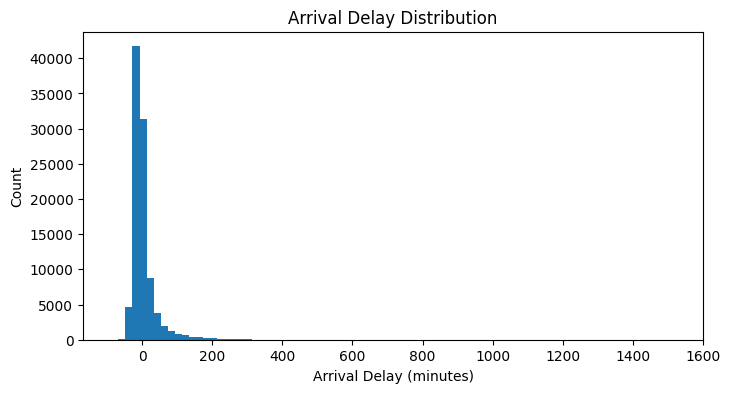

In [24]:
# 05_hist_arr_delay.py
if 'ARR_DELAY' in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df['ARR_DELAY'].dropna(), bins=80)
    plt.title('Arrival Delay Distribution')
    plt.xlabel('Arrival Delay (minutes)')
    plt.ylabel('Count')
    plt.show()


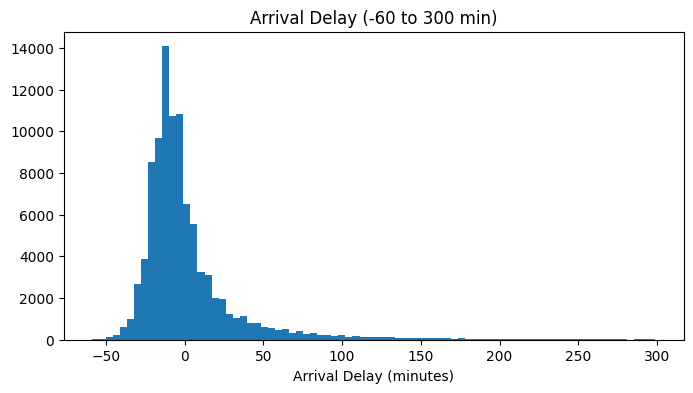

In [25]:
# 06_hist_arr_delay_zoom.py
if 'ARR_DELAY' in df.columns:
    data = df['ARR_DELAY'].dropna()
    data = data[(data > -60) & (data < 300)]
    plt.figure(figsize=(8,4))
    plt.hist(data, bins=80)
    plt.title('Arrival Delay (-60 to 300 min)')
    plt.xlabel('Arrival Delay (minutes)')
    plt.show()


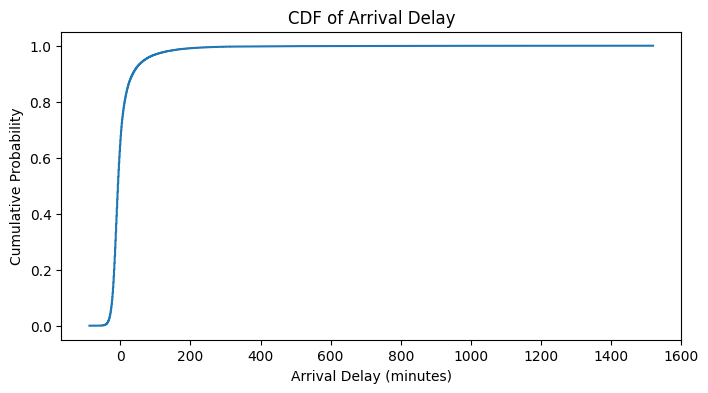

In [26]:
# 07_cdf_arr_delay.py
if 'ARR_DELAY' in df.columns:
    data = np.sort(df['ARR_DELAY'].dropna())
    p = np.arange(1, len(data)+1) / len(data)
    plt.figure(figsize=(8,4))
    plt.plot(data, p)
    plt.title('CDF of Arrival Delay')
    plt.xlabel('Arrival Delay (minutes)')
    plt.ylabel('Cumulative Probability')
    plt.show()


In [27]:
# 08_boxplot_arr_by_carrier.py
if {'OP_CARRIER','ARR_DELAY'}.issubset(df.columns):
    top_carriers = df['OP_CARRIER'].value_counts().nlargest(8).index
    subset = df[df['OP_CARRIER'].isin(top_carriers)]
    plt.figure(figsize=(10,5))
    plt.boxplot([subset.loc[subset['OP_CARRIER']==c,'ARR_DELAY'].dropna() for c in top_carriers], labels=top_carriers)
    plt.title('Arrival Delay by Carrier (top 8)')
    plt.ylabel('Arrival Delay (min)')
    plt.show()


In [28]:
# 09_median_delay_carrier.py
if {'OP_CARRIER','ARR_DELAY'}.issubset(df.columns):
    med = df.groupby('OP_CARRIER')['ARR_DELAY'].median().sort_values()
    plt.figure(figsize=(10,4))
    med.plot(kind='bar')
    plt.title('Median Arrival Delay per Carrier')
    plt.ylabel('Median Arrival Delay (min)')
    plt.show()


In [29]:
# 10_busiest_routes_bar.py
if 'route' in df.columns:
    busiest = df['route'].value_counts().head(10)
    plt.figure(figsize=(10,4))
    busiest.plot(kind='bar')
    plt.title('Top 10 Busiest Routes')
    plt.ylabel('Number of Flights')
    plt.show()


In [30]:
# 11_hourly_counts.py
if 'hour' in df.columns:
    hour_counts = df['hour'].value_counts().sort_index()
    plt.figure(figsize=(8,4))
    plt.plot(hour_counts.index, hour_counts.values, marker='o')
    plt.title('Flights per Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Flights')
    plt.grid(True)
    plt.show()


In [31]:
# 12_avg_delay_by_hour.py
if {'hour','ARR_DELAY'}.issubset(df.columns):
    avg_by_hour = df.groupby('hour')['ARR_DELAY'].mean()
    plt.figure(figsize=(8,4))
    plt.plot(avg_by_hour.index, avg_by_hour.values, marker='o')
    plt.title('Average Arrival Delay by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average Arrival Delay (min)')
    plt.grid(True)
    plt.show()


In [32]:
# 13_weekday_counts.py
if 'day_of_week' in df.columns:
    dow_counts = df['day_of_week'].value_counts().sort_index()
    plt.figure(figsize=(8,4))
    dow_counts.plot(kind='bar')
    plt.title('Flights per Day of Week (0=Mon)')
    plt.xlabel('Day of Week')
    plt.ylabel('Flights')
    plt.show()


In [33]:
# 14_avg_delay_dow.py
if {'day_of_week','ARR_DELAY'}.issubset(df.columns):
    avg_dow = df.groupby('day_of_week')['ARR_DELAY'].mean()
    plt.figure(figsize=(8,4))
    avg_dow.plot(kind='bar')
    plt.title('Average Arrival Delay by Weekday')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Arrival Delay (min)')
    plt.show()


In [34]:
# 15_monthly_counts.py
if 'month' in df.columns:
    month_counts = df['month'].value_counts().sort_index()
    plt.figure(figsize=(10,4))
    month_counts.plot(kind='bar')
    plt.title('Flights per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Flights')
    plt.show()


In [35]:
# 16_monthly_avg_delay.py
if {'month','ARR_DELAY'}.issubset(df.columns):
    month_avg = df.groupby('month')['ARR_DELAY'].mean()
    plt.figure(figsize=(10,4))
    month_avg.plot(kind='line', marker='o')
    plt.title('Average Arrival Delay by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Arrival Delay (min)')
    plt.show()


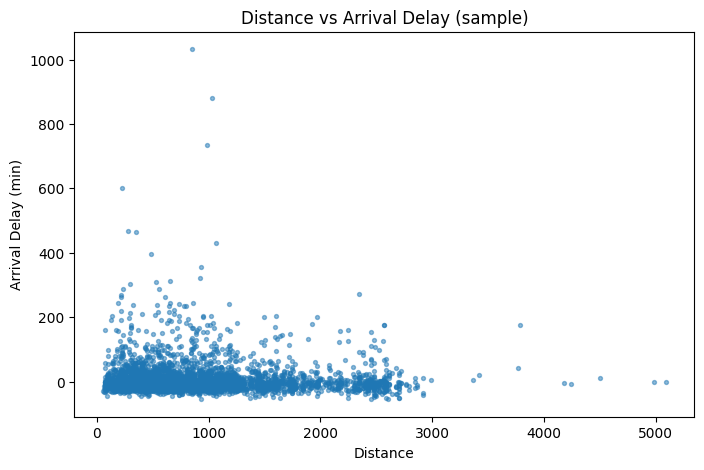

In [36]:
# 17_scatter_distance_delay.py
if {'DISTANCE','ARR_DELAY'}.issubset(df.columns):
    sample = df[['DISTANCE','ARR_DELAY']].dropna().sample(frac=0.05, random_state=42)
    plt.figure(figsize=(8,5))
    plt.scatter(sample['DISTANCE'], sample['ARR_DELAY'], alpha=0.5, s=8)
    plt.title('Distance vs Arrival Delay (sample)')
    plt.xlabel('Distance')
    plt.ylabel('Arrival Delay (min)')
    plt.show()


In [37]:
# 18_boxplots_tod.py
if {'time_of_day','ARR_DELAY'}.issubset(df.columns):
    groups = df.groupby('time_of_day')['ARR_DELAY']
    labels = []
    data = []
    for name, grp in groups:
        labels.append(name)
        data.append(grp.dropna())
    plt.figure(figsize=(8,5))
    plt.boxplot(data, labels=labels)
    plt.title('Arrival Delay by Time of Day')
    plt.ylabel('Arrival Delay (min)')
    plt.show()


In [38]:
# 19_pct_delayed_by_carrier.py
if {'OP_CARRIER','is_arr_delay_15'}.issubset(df.columns):
    pct = df.groupby('OP_CARRIER')['is_arr_delay_15'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(10,4))
    pct.plot(kind='bar')
    plt.title('Percent Flights Delayed >=15 min by Carrier')
    plt.ylabel('Percent (%)')
    plt.show()


In [39]:
# 20_heatmap_pivot_prep.py
if {'ORIGIN','DEST'}.issubset(df.columns):
    top_airports = pd.concat([df['ORIGIN'], df['DEST']]).value_counts().nlargest(20).index
    sub = df[df['ORIGIN'].isin(top_airports) & df['DEST'].isin(top_airports)]
    pivot = sub.pivot_table(index='ORIGIN', columns='DEST', values='FL_NUM' if 'FL_NUM' in df.columns else 'DISTANCE', aggfunc='count', fill_value=0)
    print("Pivot shape:", pivot.shape)


Pivot shape: (20, 20)


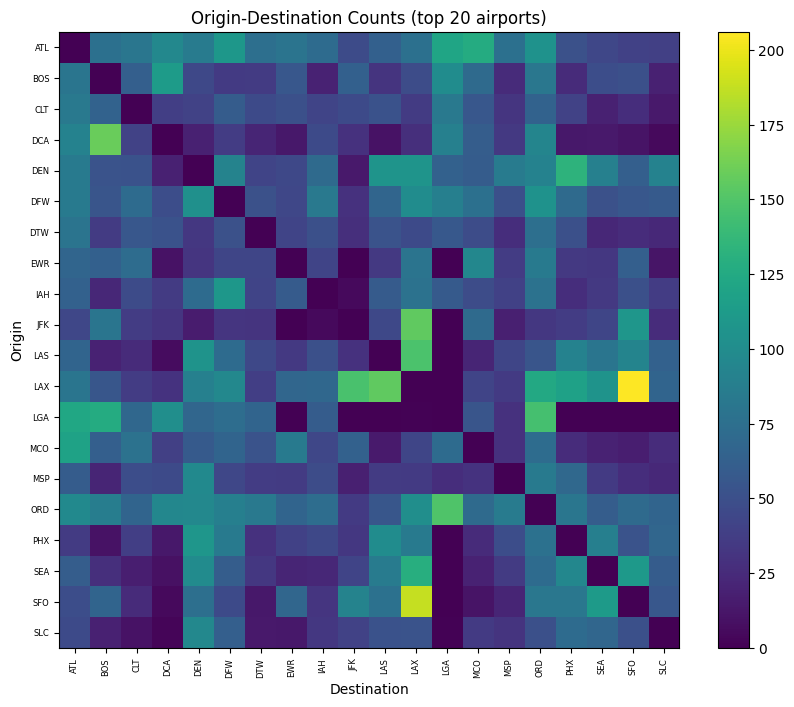

In [40]:
# 21_plot_heatmap.py
if 'pivot' in locals():
    plt.figure(figsize=(10,8))
    plt.imshow(pivot.values, aspect='auto')
    plt.title('Origin-Destination Counts (top 20 airports)')
    plt.xlabel('Destination')
    plt.ylabel('Origin')
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=90, fontsize=6)
    plt.yticks(range(len(pivot.index)), pivot.index, fontsize=6)
    plt.colorbar()
    plt.show()


In [41]:
# 22_daily_counts.py
if 'SCHEDULED_DEP' in df.columns:
    daily = df.set_index('SCHEDULED_DEP').resample('D').size()
    plt.figure(figsize=(12,4))
    plt.plot(daily.index, daily.values)
    plt.title('Daily Flight Counts')
    plt.xlabel('Date')
    plt.ylabel('Number of Flights')
    plt.show()


In [42]:
# 23_rolling_daily_avg.py
if 'SCHEDULED_DEP' in df.columns:
    daily = df.set_index('SCHEDULED_DEP').resample('D').size()
    rolling = daily.rolling(7, min_periods=1).mean()
    plt.figure(figsize=(12,4))
    plt.plot(rolling.index, rolling.values)
    plt.title('7-day Rolling Average of Daily Flights')
    plt.xlabel('Date')
    plt.ylabel('Flights (7-day avg)')
    plt.show()


In [43]:
# 24_stacked_delays_month_tod.py
if {'month','time_of_day','is_arr_delay_15'}.issubset(df.columns):
    table = df.pivot_table(index='month', columns='time_of_day', values='is_arr_delay_15', aggfunc='mean').fillna(0)
    table.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.title('Proportion of Delayed Flights by Month and Time of Day')
    plt.xlabel('Month')
    plt.ylabel('Proportion Delayed')
    plt.legend(title='Time of Day')
    plt.show()


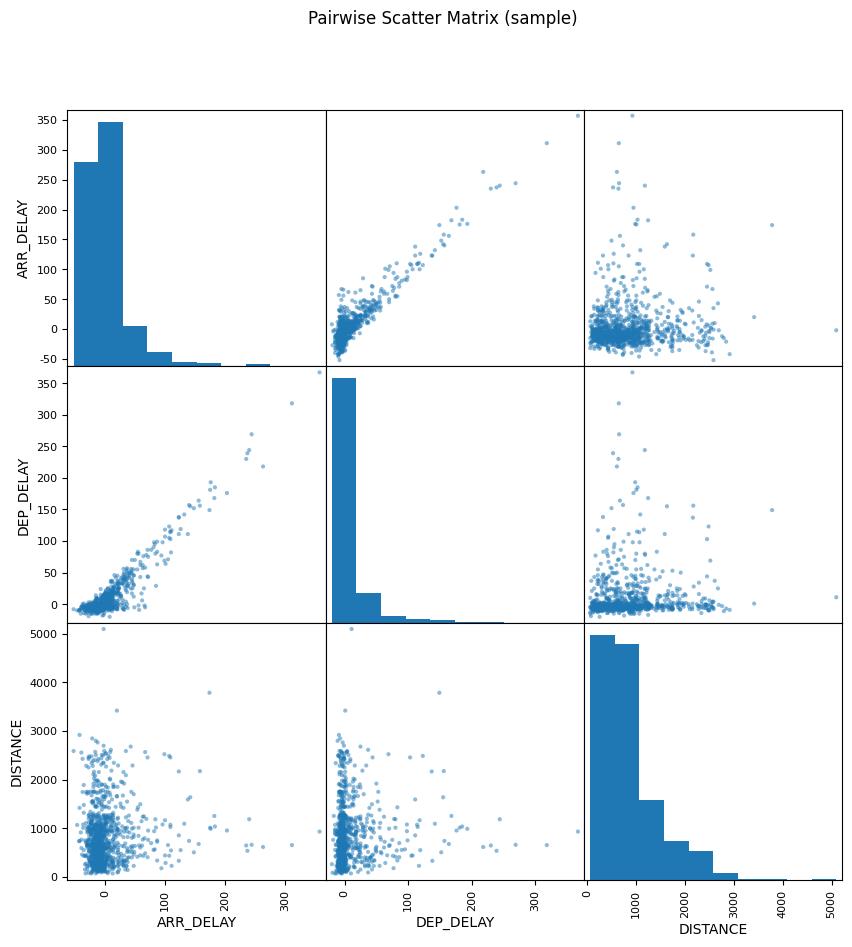

In [44]:
# 25_pairwise_sample_scatter.py
num_cols = ['ARR_DELAY','DEP_DELAY','DISTANCE'] if set(['ARR_DELAY','DEP_DELAY','DISTANCE']).issubset(df.columns) else df.select_dtypes(include=[np.number]).columns[:3].tolist()
sample = df[num_cols].dropna().sample(n=min(1000, df.shape[0]), random_state=42)
pd.plotting.scatter_matrix(sample, figsize=(10,10))
plt.suptitle('Pairwise Scatter Matrix (sample)')
plt.show()


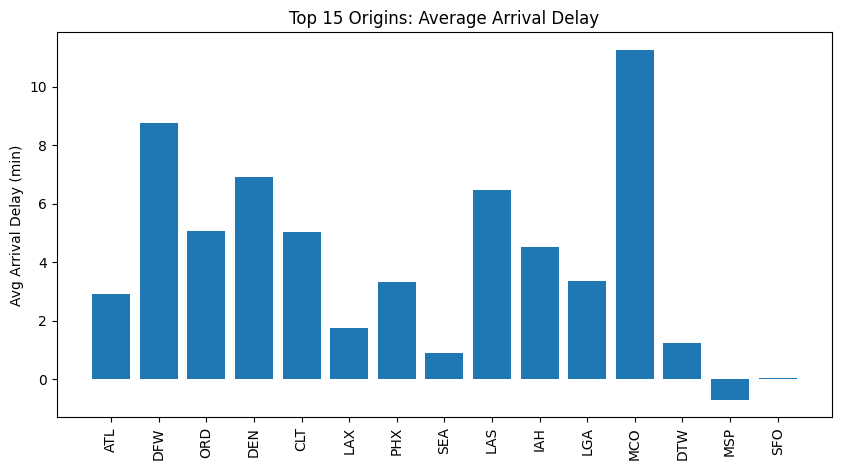

In [45]:
# 26_top_origins_avgdelay.py
if {'ORIGIN','ARR_DELAY'}.issubset(df.columns):
    top_orig = df.groupby('ORIGIN').agg(count=('ARR_DELAY','size'), avg_delay=('ARR_DELAY','mean')).sort_values('count', ascending=False).head(15)
    plt.figure(figsize=(10,5))
    plt.bar(top_orig.index, top_orig['avg_delay'])
    plt.title('Top 15 Origins: Average Arrival Delay')
    plt.xticks(rotation=90)
    plt.ylabel('Avg Arrival Delay (min)')
    plt.show()


In [46]:
# 27_boxplot_delay_by_month.py
if {'month','ARR_DELAY'}.issubset(df.columns):
    groups = [df.loc[df['month']==m,'ARR_DELAY'].dropna() for m in sorted(df['month'].dropna().unique())]
    plt.figure(figsize=(12,5))
    plt.boxplot(groups, labels=sorted(df['month'].dropna().unique()))
    plt.title('Arrival Delay by Month')
    plt.xlabel('Month')
    plt.ylabel('Arrival Delay (min)')
    plt.show()


In [47]:
# 28_carrier_concentration.py
if 'OP_CARRIER' in df.columns:
    counts = df['OP_CARRIER'].value_counts().values
    counts_sorted = np.sort(counts)[::-1]
    cum_shares = np.cumsum(counts_sorted) / counts_sorted.sum()
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(cum_shares)+1), cum_shares, marker='o')
    plt.title('Carrier Concentration (cumulative share)')
    plt.xlabel('Carrier rank')
    plt.ylabel('Cumulative flight share')
    plt.show()


In [48]:
# 29_density_overlay_top_carriers.py
if {'OP_CARRIER','ARR_DELAY'}.issubset(df.columns):
    top = df['OP_CARRIER'].value_counts().nlargest(4).index
    plt.figure(figsize=(8,5))
    for c in top:
        data = df.loc[df['OP_CARRIER']==c,'ARR_DELAY'].dropna()
        plt.hist(data, bins=80, alpha=0.4)
    plt.title('Delay distributions for top 4 carriers (overlay)')
    plt.xlabel('Arrival Delay (min)')
    plt.show()


In [49]:
# 30_median_delay_routes.py
if {'route','ARR_DELAY'}.issubset(df.columns):
    med_route = df.groupby('route')['ARR_DELAY'].median().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,4))
    med_route.plot(kind='bar')
    plt.title('Top 10 Routes by Median Arrival Delay')
    plt.ylabel('Median Arrival Delay (min)')
    plt.xticks(rotation=90)
    plt.show()


In [51]:
# 31_display_extreme_delays.py
if 'ARR_DELAY' in df.columns:
    extreme = df.nlargest(10, 'ARR_DELAY')[['FL_DATE','AIRLINE','ORIGIN','DEST','ARR_DELAY']]
    print("Top 10 extreme arrival delays:\n", extreme.to_string(index=False))

Top 10 extreme arrival delays:
    FL_DATE                            AIRLINE ORIGIN DEST  ARR_DELAY
2021-07-17             American Airlines Inc.    FCA  LGA     1520.0
2023-01-29              SkyWest Airlines Inc.    TXK  DFW     1473.0
2022-08-06             American Airlines Inc.    GRR  DFW     1458.0
2022-08-18             American Airlines Inc.    GRR  DFW     1371.0
2022-04-16             Frontier Airlines Inc.    FLL  MCO     1285.0
2022-01-06             American Airlines Inc.    JAC  DFW     1270.0
2023-06-06                  PSA Airlines Inc.    TUL  DFW     1247.0
2019-07-06 ExpressJet Airlines LLC d/b/a aha!    DTW  EWR     1207.0
2022-07-18                      Allegiant Air    FLL  CVG     1200.0
2022-09-19                      Allegiant Air    RFD  SFB     1199.0


In [52]:
# 32_cancellations_timeseries.py
if 'is_cancelled' in df.columns and 'SCHEDULED_DEP' in df.columns:
    daily_cancel = df.set_index('SCHEDULED_DEP').resample('D')['is_cancelled'].sum()
    plt.figure(figsize=(12,4))
    plt.plot(daily_cancel.index, daily_cancel.values)
    plt.title('Daily Cancelled Flights Count')
    plt.xlabel('Date')
    plt.ylabel('Cancelled Flights')
    plt.show()


In [53]:
# 33_stacked_carrier_time.py
if 'SCHEDULED_DEP' in df.columns and 'OP_CARRIER' in df.columns:
    top5 = df['OP_CARRIER'].value_counts().nlargest(5).index
    data = df[df['OP_CARRIER'].isin(top5)].set_index('SCHEDULED_DEP').groupby([pd.Grouper(freq='W'),'OP_CARRIER']).size().unstack(fill_value=0)
    data.plot.area(figsize=(12,5))
    plt.title('Weekly Flight Counts of Top 5 Carriers')
    plt.xlabel('Week')
    plt.ylabel('Flights')
    plt.show()


In [54]:
# 34_save_fig_helper.py
def save_fig(fig, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    fig.savefig(path, bbox_inches='tight')

# Example usage:
# fig = plt.figure()
# plt.plot(...)
# save_fig(fig, '/mnt/data/plots/plot1.png')


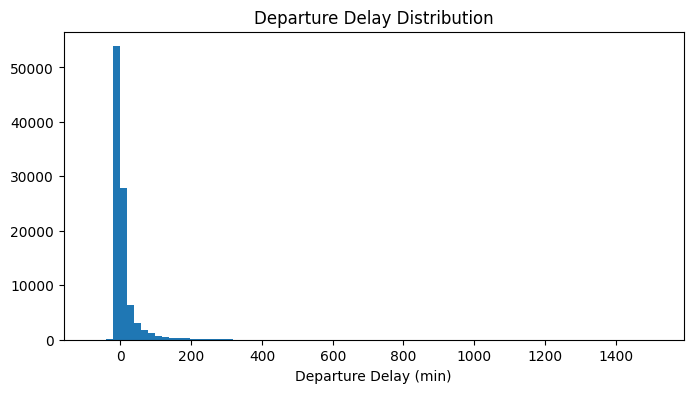

In [55]:
# 35_hist_dep_delay.py
if 'DEP_DELAY' in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df['DEP_DELAY'].dropna(), bins=80)
    plt.title('Departure Delay Distribution')
    plt.xlabel('Departure Delay (min)')
    plt.show()


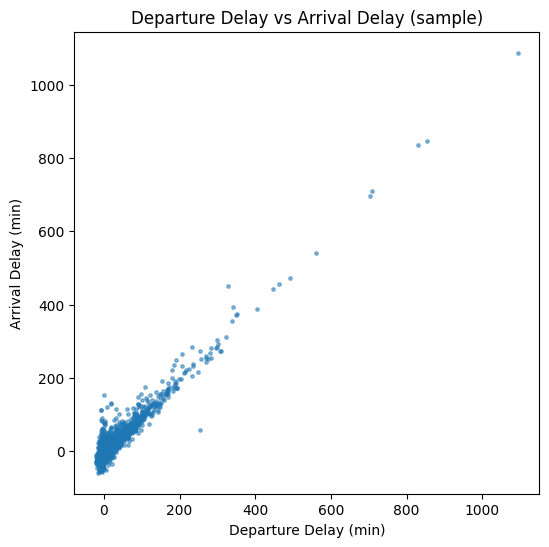

In [56]:
# 36_scatter_dep_vs_arr.py
if {'DEP_DELAY','ARR_DELAY'}.issubset(df.columns):
    samp = df[['DEP_DELAY','ARR_DELAY']].dropna().sample(frac=0.05, random_state=1)
    plt.figure(figsize=(6,6))
    plt.scatter(samp['DEP_DELAY'], samp['ARR_DELAY'], s=6, alpha=0.5)
    plt.title('Departure Delay vs Arrival Delay (sample)')
    plt.xlabel('Departure Delay (min)')
    plt.ylabel('Arrival Delay (min)')
    plt.show()


In [57]:
# 37_corr_display.py
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
print("Top correlations with ARR_DELAY:\n", corr['ARR_DELAY'].abs().sort_values(ascending=False).head(10))


Top correlations with ARR_DELAY:
 ARR_DELAY                  1.000000
DEP_DELAY                  0.964738
DELAY_DUE_CARRIER          0.705111
DELAY_DUE_LATE_AIRCRAFT    0.501467
DELAY_DUE_WEATHER          0.278140
DELAY_DUE_NAS              0.243279
TAXI_OUT                   0.194672
TAXI_IN                    0.116903
DEP_TIME                   0.111159
WHEELS_OFF                 0.106458
Name: ARR_DELAY, dtype: float64


In [58]:
# 38_dashboard_func.py
def simple_dashboard(df, figsize=(12,10)):
    plt.figure(figsize=figsize)
    plt.subplot(3,1,1)
    if 'ARR_DELAY' in df.columns:
        plt.hist(df['ARR_DELAY'].dropna(), bins=60)
        plt.title('Arrival Delay Distribution')
    plt.subplot(3,1,2)
    if 'hour' in df.columns:
        df['hour'].value_counts().sort_index().plot(kind='bar')
        plt.title('Flights per Hour')
    plt.subplot(3,1,3)
    if 'OP_CARRIER' in df.columns:
        df['OP_CARRIER'].value_counts().nlargest(5).plot(kind='bar')
        plt.title('Top 5 Carriers by Count')
    plt.tight_layout()
    plt.show()

# Usage: simple_dashboard(df.sample(frac=0.2))


In [59]:
# 39_pivot_avg_delay.py
if {'ORIGIN','DEST','ARR_DELAY'}.issubset(df.columns):
    top_airports = pd.concat([df['ORIGIN'], df['DEST']]).value_counts().nlargest(30).index
    sub = df[df['ORIGIN'].isin(top_airports) & df['DEST'].isin(top_airports)]
    pivot_avg = sub.pivot_table(index='ORIGIN', columns='DEST', values='ARR_DELAY', aggfunc='mean')
    print("Pivot avg delay shape:", pivot_avg.shape)


Pivot avg delay shape: (30, 30)


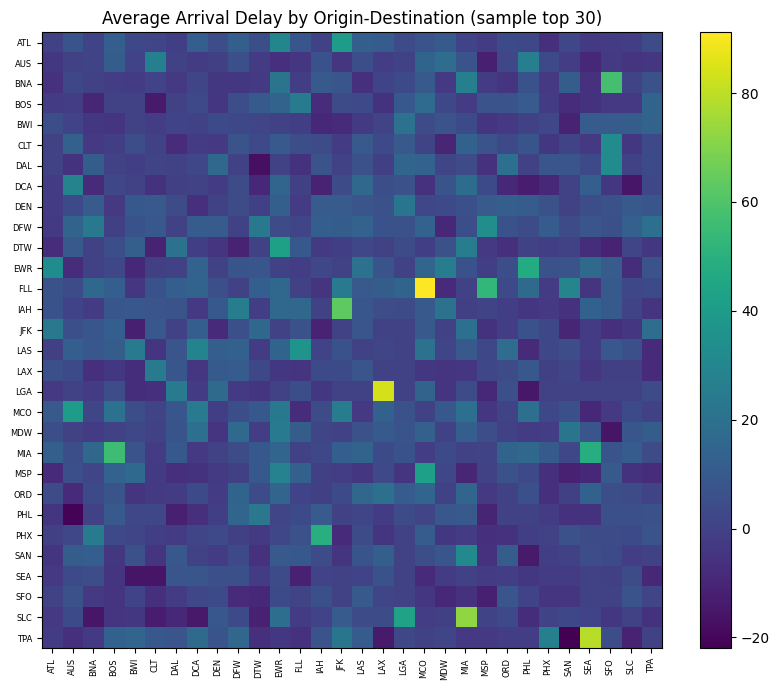

In [60]:
# 40_plot_pivot_avg.py
if 'pivot_avg' in locals():
    plt.figure(figsize=(10,8))
    arr = pivot_avg.fillna(0).values
    plt.imshow(arr, aspect='auto')
    plt.title('Average Arrival Delay by Origin-Destination (sample top 30)')
    plt.colorbar()
    plt.xticks(range(len(pivot_avg.columns)), pivot_avg.columns, rotation=90, fontsize=6)
    plt.yticks(range(len(pivot_avg.index)), pivot_avg.index, fontsize=6)
    plt.show()


In [61]:
# 41_weekly_median_delay.py
if 'SCHEDULED_DEP' in df.columns and 'ARR_DELAY' in df.columns:
    weekly_med = df.set_index('SCHEDULED_DEP').resample('W')['ARR_DELAY'].median()
    plt.figure(figsize=(12,4))
    plt.plot(weekly_med.index, weekly_med.values)
    plt.title('Weekly Median Arrival Delay')
    plt.xlabel('Week')
    plt.ylabel('Median Arrival Delay (min)')
    plt.show()


In [62]:
# 42_route_delay_std.py
if {'route','ARR_DELAY'}.issubset(df.columns):
    route_std = df.groupby('route')['ARR_DELAY'].agg(['std','count']).sort_values('std', ascending=False).head(20)
    print("Routes with highest delay std:\n", route_std.head(10))


/tmp/ipython-input-2388241245.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_avg = df.groupby('dist_bucket')['ARR_DELAY'].mean()


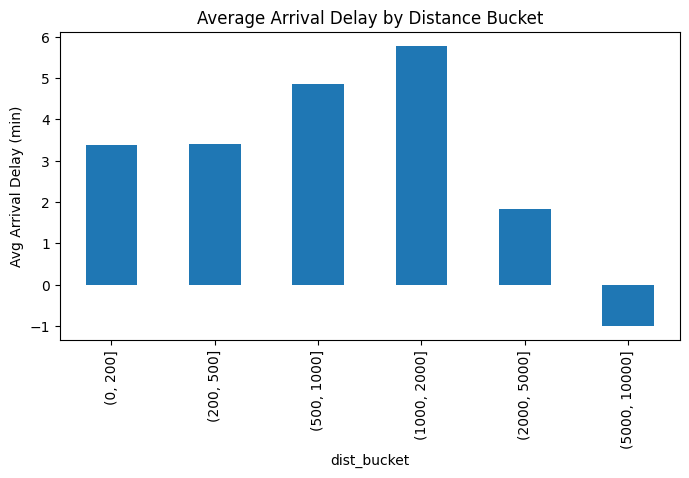

In [63]:
# 43_distance_buckets_delay.py
if {'DISTANCE','ARR_DELAY'}.issubset(df.columns):
    df['dist_bucket'] = pd.cut(df['DISTANCE'], bins=[0,200,500,1000,2000,5000,10000])
    bucket_avg = df.groupby('dist_bucket')['ARR_DELAY'].mean()
    plt.figure(figsize=(8,4))
    bucket_avg.plot(kind='bar')
    plt.title('Average Arrival Delay by Distance Bucket')
    plt.ylabel('Avg Arrival Delay (min)')
    plt.show()


In [64]:
# 44_top_routes_cancellations.py
if {'route','is_cancelled'}.issubset(df.columns):
    cancelled = df.groupby('route')['is_cancelled'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,4))
    cancelled.plot(kind='bar')
    plt.title('Top 10 Routes by Number of Cancellations')
    plt.ylabel('Cancelled Flights')
    plt.xticks(rotation=90)
    plt.show()


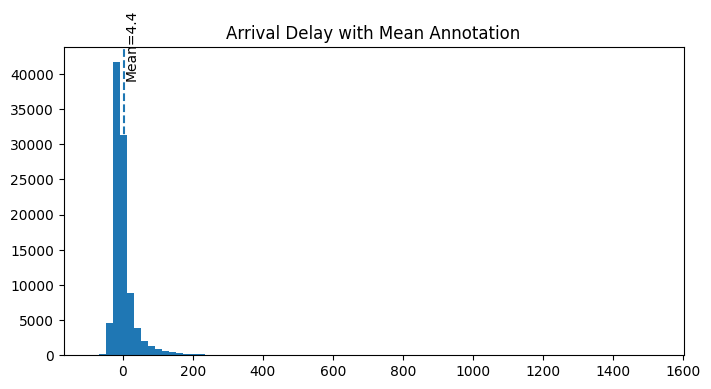

In [65]:
# 45_annotate_mean_delay.py
if 'ARR_DELAY' in df.columns:
    mean_delay = df['ARR_DELAY'].mean()
    plt.figure(figsize=(8,4))
    plt.hist(df['ARR_DELAY'].dropna(), bins=80)
    plt.axvline(mean_delay, linestyle='--')
    plt.text(mean_delay+2, plt.ylim()[1]*0.9, f'Mean={mean_delay:.1f}', rotation=90)
    plt.title('Arrival Delay with Mean Annotation')
    plt.show()


In [66]:
# 46_save_multiple_plots.py
plot_dir = "/mnt/data/plots_week3"
os.makedirs(plot_dir, exist_ok=True)

# Example: save avg delay by hour plot
if {'hour','ARR_DELAY'}.issubset(df.columns):
    plt.figure(figsize=(8,4))
    df.groupby('hour')['ARR_DELAY'].mean().plot()
    plt.title('Avg Arrival Delay by Hour')
    plt.savefig(os.path.join(plot_dir, "avg_delay_by_hour.png"), bbox_inches='tight')
    plt.close()
    print("Saved avg_delay_by_hour.png")


In [67]:
# 47_create_summary_csv.py
if {'OP_CARRIER','ARR_DELAY','is_cancelled'}.issubset(df.columns):
    summary = df.groupby('OP_CARRIER').agg(total_flights=('ARR_DELAY','size'),
                                           avg_delay=('ARR_DELAY','mean'),
                                           pct_cancelled=('is_cancelled','mean'))
    summary['pct_cancelled'] = summary['pct_cancelled'] * 100
    summary = summary.sort_values('avg_delay', ascending=False)
    summary.to_csv('/mnt/data/carrier_summary_week3.csv')
    print("Saved carrier_summary_week3.csv")


In [68]:
# 48_display_topn.py
def display_topn(df, groupby_cols, agg_dict, n=10):
    summary = df.groupby(groupby_cols).agg(agg_dict)
    print(summary.sort_values(list(agg_dict.values()), ascending=False).head(n).to_string())

# Example:
# display_topn(df, 'route', {'ARR_DELAY':'mean','DISTANCE':'mean'}, n=10)


In [69]:
# 49_export_plots_pdf.py
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('/mnt/data/week3_plots.pdf')

# Add a couple of plots as examples
if 'ARR_DELAY' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['ARR_DELAY'].dropna(), bins=80)
    plt.title('Arrival Delay Distribution')
    pp.savefig(fig)
    plt.close(fig)

if 'hour' in df.columns:
    fig = plt.figure(figsize=(8,4))
    df['hour'].value_counts().sort_index().plot(kind='bar')
    plt.title('Flights per Hour')
    pp.savefig(fig)
    plt.close(fig)

pp.close()
print("Saved week3_plots.pdf")


Saved week3_plots.pdf


In [70]:
# 50_textual_insights_generator.py
def generate_insights(df):
    insights = []
    if 'ARR_DELAY' in df.columns:
        mean = df['ARR_DELAY'].mean()
        median = df['ARR_DELAY'].median()
        insights.append(f"Arrival delay mean = {mean:.1f} min, median = {median:.1f} min.")
    if 'OP_CARRIER' in df.columns and 'ARR_DELAY' in df.columns:
        top = df.groupby('OP_CARRIER')['ARR_DELAY'].median().nsmallest(3)
        insights.append("Top 3 carriers by lowest median arrival delay: " + ", ".join(top.index.tolist()))
    return "\n".join(insights)

print("Sample insights:\n", generate_insights(df))


Sample insights:
 Arrival delay mean = 4.4 min, median = -7.0 min.


In [71]:
# Create 'route' column
df['route'] = df['ORIGIN'] + '-' + df['DEST']

# Convert 'FL_DATE' to datetime and extract date-related features
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['day_of_week'] = df['FL_DATE'].dt.dayofweek
df['month'] = df['FL_DATE'].dt.month
df['year'] = df['FL_DATE'].dt.year

# Create 'hour' and 'time_of_day' columns from CRS_DEP_TIME
df['CRS_DEP_TIME_STR'] = df['CRS_DEP_TIME'].astype(str).str.zfill(4)
df['hour'] = pd.to_numeric(df['CRS_DEP_TIME_STR'].str[:2], errors='coerce')

def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    return np.nan

df['time_of_day'] = df['hour'].apply(get_time_of_day)

# Create 'is_arr_delay_15' column
df['is_arr_delay_15'] = (df['ARR_DELAY'] >= 15).astype(int)

print("Created new columns: route, day_of_week, month, year, hour, time_of_day, is_arr_delay_15")
print("\nUpdated dataframe head:\n", df.head(3).to_string())

Created new columns: route, day_of_week, month, year, hour, time_of_day, is_arr_delay_15

Updated dataframe head:
      FL_DATE                 AIRLINE                 AIRLINE_DOT AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN                     ORIGIN_CITY DEST        DEST_CITY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT   dist_bucket    route  day_of_week  month  year CRS_DEP_TIME_STR  hour time_of_day  is_arr_delay_15
0 2019-03-01           Allegiant Air           Allegiant Air: G4           G4     20368       1668    PGD                 Punta Gorda, FL  SPI  Springfield, IL           630     620.0      -10.0       9.0       629.0      731.0      7.0           810     738.0      -32.0        0.0               NaN       0.0             